# Primer ejercicio

### Importe de librerías

In [13]:
import numpy as np
from math import floor
from scipy.special import erfc
import matplotlib.pyplot as plt

# Inciso i

i. Proponga las matrices generadora y de control de paridad. Determine cuántos errores puede
corregir y detectar sin cometer errores. Calcule la ganancia de codificación asintótica

### Matriz generadora y de control de paridad

El código es un (14,10), por lo tanto:
- n=14 (longitud total de la palabra de codigo)
- k=10 (longitud del mensaje original)
- n-k=4 (bits de paridad)

Usamos la forma sistemática:

- G = [I|P] donde
- I = matriz identidad (10x10)
- P = matriz de paridad (10x4)

Aplicando la cota de hamming, llegamos a que tc = 1 (15 <= 16), por lo tanto dmin = 2*tc + 1 = 2*1+1 = 3
- Elegimos una matriz P que sea válida para un código de Hamming extendido (14,10) con dmin = 3

In [14]:
n = 14
k = 10
dmin = 3

I = np.eye(k, dtype=int)
print ("Matriz identidad I[k*k]")
print(" ")
print (I)


Matriz identidad I[k*k]
 
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


A continuación se arma la matriz de paridad, cumpliendo que:
-  las filas sea distintas y no nulas
- wH > Dmin - 1 --> wH> 0 (cada fila debe tener por lo menos 1 uno)
- filas linealmente independientes

In [15]:
P = np.array([
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1]
], dtype=int)


print("Matriz de paridad P [ k * (n-k) ]")
print(" ")
print(P)

Matriz de paridad P [ k * (n-k) ]
 
[[1 0 1 1]
 [1 1 0 1]
 [0 1 1 1]
 [1 1 1 0]
 [1 1 0 0]
 [0 1 1 0]
 [1 0 1 0]
 [1 0 0 1]
 [0 1 0 1]
 [0 0 1 1]]


In [16]:
G = np.hstack((I, P))
print("Matriz G --> G[k*n] = [ I k*k | P k*(n-k) ]")
print(" ")
print(G)


Matriz G --> G[k*n] = [ I k*k | P k*(n-k) ]
 
[[1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 1]]


In [17]:
I_2 = np.eye(n-k, dtype=int)
H = np.hstack((P.T, I_2))
print("\nMatriz HT:")
print ("HT = [ P  (k)  * (n-k)" )
print("       I (n-k) * (n-k) ]")
print(" ")
print(H.T)


Matriz HT:
HT = [ P  (k)  * (n-k)
       I (n-k) * (n-k) ]
 
[[1 0 1 1]
 [1 1 0 1]
 [0 1 1 1]
 [1 1 1 0]
 [1 1 0 0]
 [0 1 1 0]
 [1 0 1 0]
 [1 0 0 1]
 [0 1 0 1]
 [0 0 1 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


### Errores corregibles y detectables sin cometer errores

In [18]:
# Errores corregibles
tc = floor((dmin - 1) / 2)
print(f"La cantidad de errores corregibles son: {tc} ")

# Errores detectables
td = dmin - 1
print(f"La cantidad de errores detectables son: {td}")

La cantidad de errores corregibles son: 1 
La cantidad de errores detectables son: 2


### Ganancia asintótica (detección dura)

In [19]:
Ga = (k / n) * floor((dmin + 1) / 2)
print(f"La ganancia asintótica Ga (detección dura) es de ≈ {Ga:.3f}")


La ganancia asintótica Ga (detección dura) es de ≈ 1.429


# Simulación (código corrector)

Releve las curvas de tasa de error de palabra de código y de bit de fuente cuando se lo usa
como código corrector. Compárelas con los resultados teóricos correspondientes y con las
del sistema sin codificación.  Recuerde que en un sistema binario antipodal como BPSK, la
probabilidad de error de bit en el canal resulta:

$$
P_{eb} = Q \left( \sqrt{\frac{2E_b}{N_0}} \right)
$$


### Definición de parámetros iniciales

Eb/N0 indica cuanta energía le dedicamos a cada bit, en comparación con el ruido de canal. Es una métrica clave para analizar el desempeño de sistemas de comunicación digital.
- Eb = energía promedio por bit transmitido
- No = densidad espectral del ruido blanco gaussiano

- Cuanto mayor es Eb/No mayor será la probabilidad de recibir bien los bits (menor tasa de error)
- Cuanto menor es Eb/No, más probabilidad de errores (más ruido relativo)

Analizamos de 0 a 9 db --> EbN0_dB = [0,1,2,3,4,5,6,7,8,9]

In [20]:
EbN0_dB = np.arange(0, 10, 1)  # Rango de Eb/N0 en dB

In [21]:
num_bloques = 1000000  # Número de bloques (palabras de codigo) a simular
A = 1                   # Amplitud BPSK

In [22]:
Pe_palabra_sim = []     #errores de palabra simulados
Pb_bit_sim = []         #errores de bit simulados
Pb_teorico = []         #curva teorica para sistema sin codificacion

### Simulación

In [ ]:
for EbN0 in EbN0_dB:
    # Conversión de Eb/N0 de dB a veces
    EbN0_veces = 10**(EbN0/10)

    # Cálculo de energías
    Es = A**2               # Energía del símbolo (A es la amplitud de BPSK)
    Ebf = Es * n / k        # Energía por bit de fuente
    N0 = Ebf / EbN0_veces   # Densidad espectral del ruido (N0)

    #Q_teorica
    Pb = 0.5 * erfc(np.sqrt(2*EbN0_veces) / np.sqrt(2))  # Probabilidad de bit error para BPSK
    Q_teorica = 1 - (1 - Pb)**n  # Probabilidad teórica de error de palabra
    if Q_teorica == 0:
        Q_teorica = 1e-12  # Esto se hace para evitar la división por cero

    # Se calculan el número de bloques M = NumBloques / Q_teorica
    M = max(num_bloques, int(10 / Q_teorica))  

    # Inicialización de los contadores de errores
    errores_palabra = 0
    errores_bit = 0
    total_bits = M * k      # Total de bits transmitidos para calcular Pb

    # Simulación de transmisión y decodificación (forma matricial)

    # Generación de palabras aleatorias: U es una matriz M x k
    U = np.random.randint(0, 2, (M, k))  

    # Codificación matricial usando G: V es M x n
    V = np.mod(U @ G, 2) 

    # Modulación BPSK: 0 -> -A, 1 -> A
    S = (2 * V - 1) * A  

    # Ruido AWGN 
    noise = np.sqrt(N0/2) * (np.random.randn(M, n) + 1j * np.random.randn(M, n))

    # Señal recibida = señal transmitida + ruido
    R = S + noise

    # Demodulación con detección dura (umbral 0)
    VR = (np.real(R) > 0).astype(int)  

    # Cálculo del síndrome para todos los bloques
    SIND = np.mod(VR @ H.T, 2)  # M x (n-k)

    # Corrección de errores por fila
    VR_corregida = VR.copy()
    for i in range(M):
        S_i = SIND[i]
        if np.any(S_i):  # Si el síndrome es distinto de 0, hubo error
            for j, row in enumerate(H.T):
                if np.array_equal(S_i, row):
                    VR_corregida[i, j] = 1 - VR_corregida[i, j]  # Corregimos el bit correspondiente
                    break

    # Decodificación sistemática (primeros k bits de cada bloque)
    U_est = VR_corregida[:, :k]

    # Conteo de errores
    errores_palabra = np.sum(~np.all(V == VR_corregida, axis=1))  # Error si V distinto de VR_corregida
    errores_bit = np.sum(U != U_est)  # Comparar U original con U_est (decodificado)
    
    # Probabilidades de error
    Pe_palabra_sim.append(errores_palabra / M)  # Probabilidad de error de palabra
    Pb_bit_sim.append(errores_bit / (M * k))    # Probabilidad de error de bit
    Pb_teorico.append(Pb)  # Pb teórico (BPSK)


### Graficos

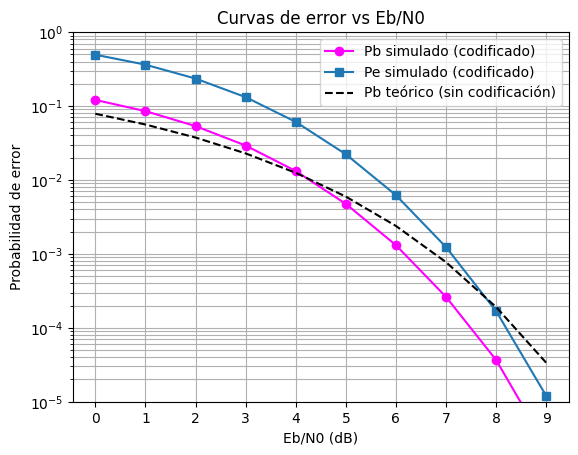

In [24]:
plt.semilogy(EbN0_dB, Pb_bit_sim, 'o-', color='magenta',label="Pb simulado (codificado)")
plt.semilogy(EbN0_dB, Pe_palabra_sim, 's-', label="Pe simulado (codificado)")
plt.semilogy(EbN0_dB, Pb_teorico, 'k--', label="Pb teórico (sin codificación)")
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("Probabilidad de error")
plt.title("Curvas de error vs Eb/N0")
plt.grid(True, which="both")
plt.xticks(np.arange(0, 10, 1))  # Eje X de 0 a 9, paso 1
plt.ylim(1e-5, 1)  # Escala del eje Y: de 10^-5 a 1
plt.legend()
plt.show()


# Simulación (código detector)

En el ejercicio anterior, se usó el código para corregir errores. En este caso solo lo usaremos como detector
- Si el síndrome es distinto de 0, se detecta el error, pero no se corrige.
- Se cuenta la palabra como erronea
- En vez de corregir la palabra, simplemente registramos que hubo error

### Definición de parámetros iniciales

In [25]:
Pe_palabra_sim = []         #errores de palabra simulados
Pb_bit_sim = []             #errores de bit simulados
Pb_teorico = []             #curva teórica para sistema sin codificación
num_bloques = 1000000       #número de bloques (palabras de código)

### Simulación con matrices

In [ ]:
for EbN0 in EbN0_dB:
    # Conversión de Eb/N0 de dB a veces
    EbN0_veces = 10**(EbN0/10)

    # Cálculo de energías
    Es = A**2               # Energía del símbolo
    Ebf = Es * n / k        # Energía por bit de fuente
    N0 = Ebf / EbN0_veces   # Densidad espectral del ruido (N0)

     #Q_teorica
    Pb = 0.5 * erfc(np.sqrt(2*EbN0_veces) / np.sqrt(2))  # Probabilidad de bit error para BPSK
    Q_teorica = 1 - (1 - Pb)**n  # Probabilidad teórica de error de palabra
    if Q_teorica == 0:
        Q_teorica = 1e-12  # Esto se hace para evitar la división por cero

    # Se calculan el número de bloques M = NumBloques / Q_teorica
    M = max(num_bloques, int(10 / Q_teorica))  

    # Inicialización de contadores
    errores_palabra = 0
    errores_bit = 0
    total_bits = M * k
    palabras_validas = 0


    # Generación de palabras aleatorias: U es una matriz M x k
    U = np.random.randint(0, 2, (M, k))

    # Codificación matricial usando G: V es M x n
    V = np.mod(U @ G, 2)

    # Modulación BPSK: 0 -> -A, 1 -> A
    S = (2 * V - 1) * A  # M x n

    # Ruido AWGN complejo
    noise = np.sqrt(N0/2) * (np.random.randn(M, n) + 1j * np.random.randn(M, n))

    # Señal recibida
    R = S + noise

    # Demodulación con detección dura (umbral 0)
    VR = (np.real(R) > 0).astype(int)  # M x n

    # Cálculo del síndrome para todos los bloques
    SIND = np.mod(VR @ H.T, 2)  # M x (n-k)

    # Detección de errores
    errores_palabra = np.sum(np.any(SIND != 0, axis=1))  # Bloques con síndrome distinto de 0
    palabras_validas = np.sum(~np.any(SIND != 0, axis=1))  # Bloques con síndrome = 0

    # Decodificación sistemática solo en palabras válidas
    U_est = VR[:, :k]
    U_val = U[~np.any(SIND != 0, axis=1)]      # U solo para palabras válidas
    U_est_val = U_est[~np.any(SIND != 0, axis=1)]  # U_est solo para palabras válidas

    errores_bit = np.sum(U_val != U_est_val)  # Errores en bits solo en palabras válidas

    # PROBABILIDADES DE ERROR
    Pe_palabra_sim.append(errores_palabra / M)
    if palabras_validas > 0:
        Pb_bit_sim.append(errores_bit / (palabras_validas * k))
    else:
        Pb_bit_sim.append(1)  # Si todas las palabras dieron error, Pb=1

    # Pb teórico para BPSK sin codificación
    Pb_teorico.append(Pb)


### Gráficos

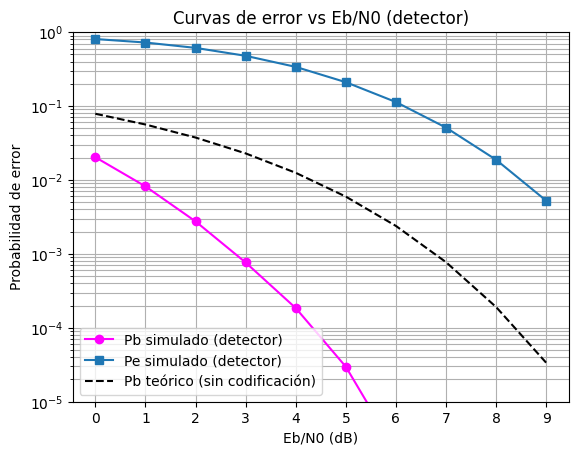

In [27]:
plt.semilogy(EbN0_dB, Pb_bit_sim, 'o-', color='magenta', label="Pb simulado (detector)")
plt.semilogy(EbN0_dB, Pe_palabra_sim, 's-', label="Pe simulado (detector)")
plt.semilogy(EbN0_dB, Pb_teorico, 'k--', label="Pb teórico (sin codificación)")
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("Probabilidad de error")
plt.title("Curvas de error vs Eb/N0 (detector)")
plt.grid(True, which="both")
plt.xticks(np.arange(0, 10, 1)) 
plt.ylim(1e-5, 1) 
plt.legend()
plt.show()
